# Sagar Lekhak
## A Notebook on Exploratory Data Analysis (EDA) for Multi spectral Data.
### Phd Student, Year II, Imaging Science Department, Chester F. Carlson Center for Imaging Science
### Rochester Institute of Technology.

In [486]:
#Import necessary libraries.
import numpy as np
import cmocean
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import skew, kurtosis


# Problem 1:

Let's work on understanding and visulaizing the data first.

In [201]:
# Load the data in .npy format.
sentinel2_rochester_data = np.load('sentinel2_rochester.npy')

In [202]:
#Check the shape of the data.
print(sentinel2_rochester_data.shape)

(954, 716, 12)


In [203]:
#Check the datatype.
print(sentinel2_rochester_data.dtype)

float64


Display data info from original source.

In [483]:
# Check the original data from the source.
# Source: https://www.earthdata.nasa.gov/data/instruments/sentinel-2-msi
# Display Sentinel-2A data bands information.

#Create a dictionary with the band information (band number, central wavelength, and bandwidth)

data = {
    "Band Number": [1, 2, 3, 4, 5, 6, 7, 8, "8a", 9, 10, 11, 12],
    "Central Wavelength (nm)": [442.7, 492.7, 559.8, 664.6, 704.1, 740.5, 782.8, 832.8, 864.7, 945.1, 1373.5, 1613.7, 2202.4],
    "Bandwidth (nm)": [20, 65, 35, 30, 14, 14, 19, 105, 21, 19, 29, 90, 174]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Display the DataFrame
print(df)

   Band Number  Central Wavelength (nm)  Bandwidth (nm)
0            1                    442.7              20
1            2                    492.7              65
2            3                    559.8              35
3            4                    664.6              30
4            5                    704.1              14
5            6                    740.5              14
6            7                    782.8              19
7            8                    832.8             105
8           8a                    864.7              21
9            9                    945.1              19
10          10                   1373.5              29
11          11                   1613.7              90
12          12                   2202.4             174


However, for this assignment, the band 10 is excluded or removed in the provided Sentinel-2 data.
Let's visualize the data to understand it properly. Since the data does not contain a 10th band, the band order displayed below is represented as Band 1–12, corresponding to the 12 available bands.


Let's define a function that takes multispectral data, a title, and the type of colormap as arguments, and displays each band.


In [481]:
#Define a function that takes a multi spectral data, title and type of colormap used, as an argument and displays each band.

def display_multispectral_data(data, title, cmap):

    """
    :param data: numpy array of size r x c x bands
    :param title: string (whatever is desired)
    :return: nothing, just displays the bands
    """

    if isinstance(cmap, str):   #solves the problem faced when 'jet' cmap is to be passed as string('jet')
        cmap = cm.get_cmap(cmap)

    num_bands = data.shape[2]
    fig, axes = plt.subplots(3, 4, figsize=(15, 10))

    # Add a common title on top.
    fig.suptitle(f'{title}, cmap={cmap.name}', fontsize=16, y=1.02)  # y =1.02 moves the title slightly upwards to avoid overlapping with subplots.

    for i in range(num_bands):
        ax = axes[i // 4, i % 4]  #axes here is 2d matrix of 3x4
        im = ax.imshow(data[:, :, i], cmap=cmap)
        ax.set_title(f'Band {i + 1}')
        fig.colorbar(im, ax=ax)

    plt.tight_layout()
    plt.show()


Let's display the original data with cmap used from cmocean package (cmocean.cm.thermal).

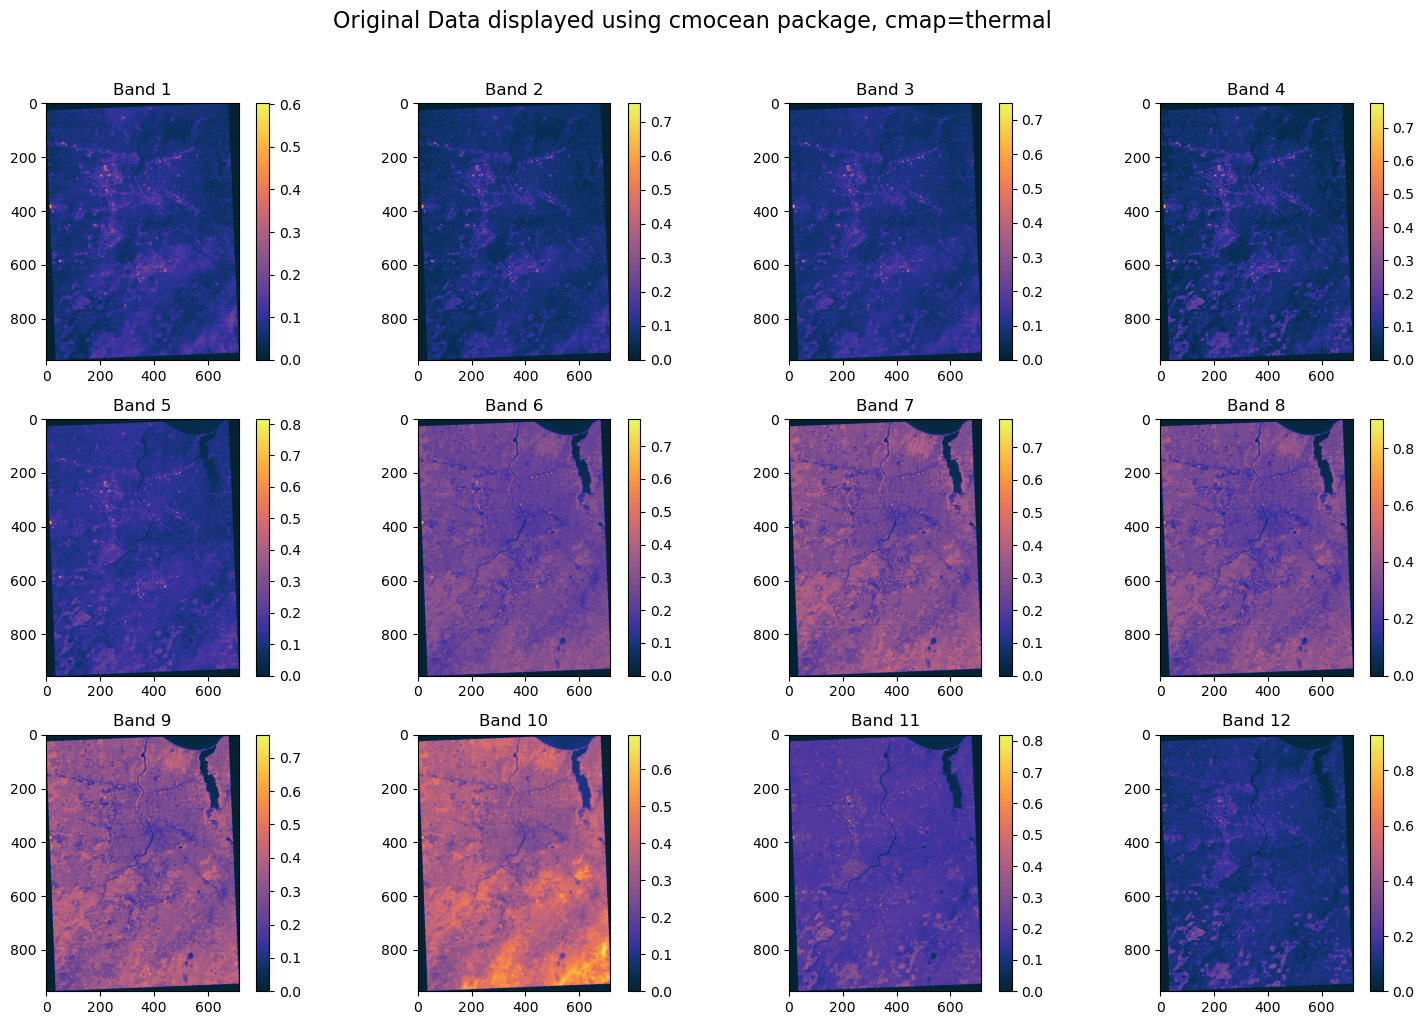

In [484]:
# Display original data with cmap used from cmocean package. cmocean.cm.thermal
display_multispectral_data(sentinel2_rochester_data, "Original Data displayed using cmocean package", cmocean.cm.thermal)

Let's display original data with another cmap : "jet" cmap from matplotlib.

C:\Users\Usuario\AppData\Local\Temp\ipykernel_33180\1421297102.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap(cmap)


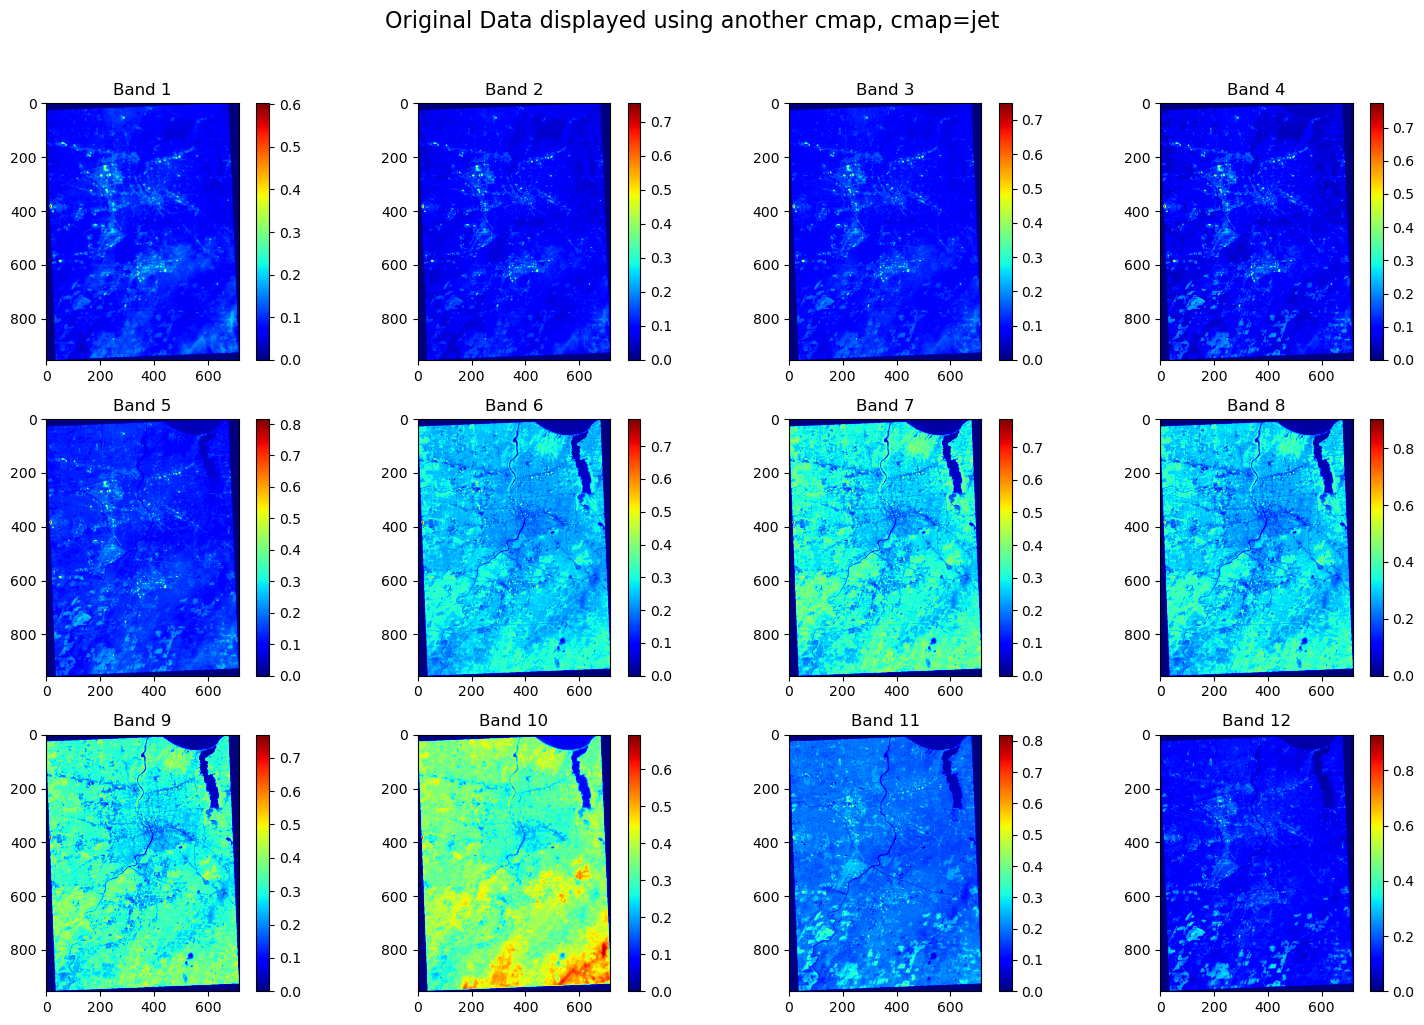

In [485]:
# Display original data with another cmap : "jet" cmap from matplotlib
display_multispectral_data(sentinel2_rochester_data, "Original Data displayed using another cmap", 'jet')

In [487]:
#An alternate way to code the same functionality is by using a for loop with the enumerate function.

#--------------------------------------------------------------------------------------------------------------------

# use of 'enumerate'. It's used when the index is also important
# 'Enumerate' function is a built-in utility that simplifies iteration over an iterable (like a list, tuple, or string) by returning both the index and the corresponding element during each iteration.

# num_bands = sentinel2_rochester_data.shape[2]
# fig, axes = plt.subplots(3, 4, figsize=(15, 10))
#
# for i, ax in enumerate(axes.flat):   # axes.flat converts 3x4 2d array into a 1D iterable
#     im = ax.imshow(sentinel2_rochester_data[:, :, i], cmap=cmocean.cm.thermal)
#     ax.set_title(f'Band {i + 1}')
#     fig.colorbar(im, ax=ax)
#
# plt.tight_layout()
# plt.show()


Let's visualize the RGB imagery from the provided bands. Here, in the provided Sentinel-2 data, these bands are B2, B3 and B4.

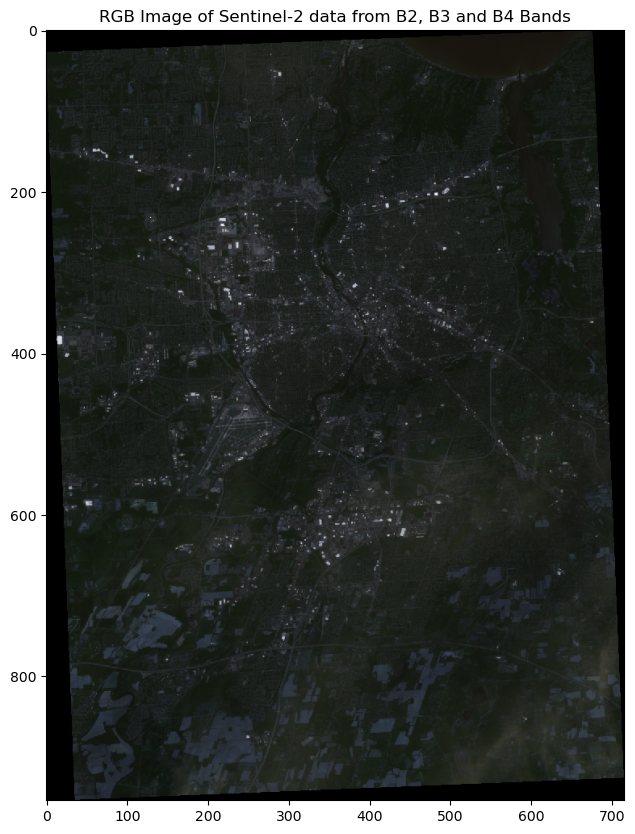

In [501]:
# Extract the RGB bands (B2, B3 and B4).
rgb_image = sentinel2_rochester_data[:, :, 1:4]

# Normalize values between 0 and 1 (if needed)
rgb_image = (rgb_image - np.nanmin(rgb_image)) / (np.nanmax(rgb_image) - np.nanmin(rgb_image))

# Set figure size
plt.figure(figsize=(10, 10))

# Display the RGB image
plt.imshow(rgb_image)
plt.axis("on")
plt.title("RGB Image of Sentinel-2 data from B2, B3 and B4 Bands")
plt.show()

### Display histogram of the data:
The histogram provides a graphical representation of the distribution of pixel intensities in an image. It can reveal the presence of no-data points (such as zeros) or outliers. If a significant number of pixel values are concentrated around zero, it may indicate missing data or areas where the image contains no meaningful information. As seen in the plots above, there are some no-data points. Let's visualize the histograms to examine this further.

In [230]:
#Design a function that takes input a multispectral data and display histogram of each band.
def plot_histogram(dataset, title):
    fig, axes = plt.subplots(3, 4, figsize=(15,10))
    num_bands = dataset.shape[2]

    fig.suptitle(f'{title}', fontsize=16, y=1.02)

    for i in range(num_bands):
        ax = axes[i // 4, i % 4]  #axes here is 2d matrix of 3x4
        ax.hist(dataset[:,:,i].flatten(), bins = 100, color = 'blue', alpha = 0.5)  #ax represents specific subplot
        ax.set_title(f"Histogram of Band {i}.")

    plt.tight_layout()
    plt.show()

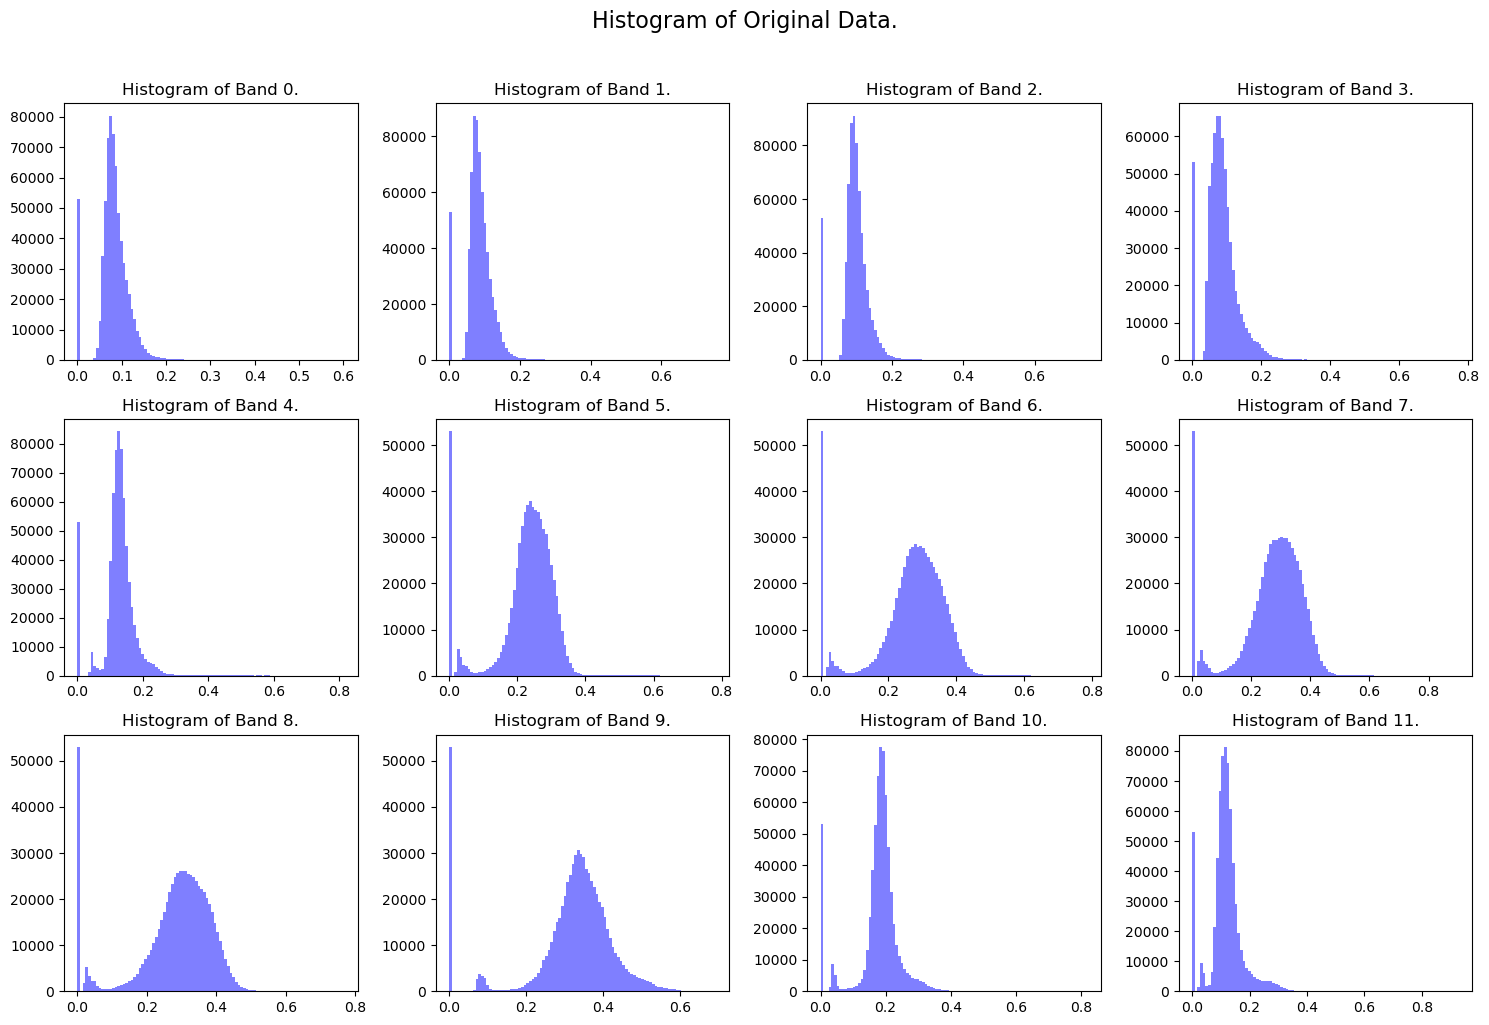

In [231]:
#Display histogram of the original data.
plot_histogram(sentinel2_rochester_data, "Histogram of Original Data.")

### No data or "0" data handling and Stretching.
 As observed in the histograms above for different bands, there are many data points with no data or zero ('0') values. These zero values can interfere with data analysis and lead to inaccurate statistics. To improve data visualization, we can apply various stretching techniques, but handling the no-data points should be the first step. Stretching in image processing is crucial for enhancing image contrast by adjusting the pixel intensity range for better visualization. We will experiment with different stretching techniques; however, let's first explore how stretching may not be effective if we don't address the no-data points beforehand.

For stretching, we can either create a function that can be called to apply stretching. However, to experiment with multiple stretching techniques, it is more efficient to create a class that includes various stretching methods as its functions.

In [491]:
class Stretching:
    """
    To apply different kinds of stretching.
    """
    def __init__(self, dataset):
        """
        initializes class with input data
        :param dataset: a multispectral image (3d numpy array) as r x c x bands .

        """
        self.dataset = dataset
        self.num_bands = dataset.shape[2]  #calculating number of bands during intialization so that we don't have to repeat it for each method below.

    def linear_stretch(self):
        """
        Apply linear stretching to each band in multispectral data.
        :return: a multispectral data after applying linear stretch to each bands .
        """

        stretched_data = np.zeros_like(self.dataset, dtype =np.float64)
        # The line stretched_data = np.zeros_like(self.dataset, dtype=np.float64) is used to create a new array that will store the stretched data. This is done to avoid modifying the original dataset directly. If we operated directly on self.dataset in each method, the original data would be overwritten after each operation. As a result, calling another method would work with the modified data rather than the original one. By using a separate stretched_data array, we ensure that each method works independently on the original data.

        # Careful: can't use .min() because of nan values in data. It produces different results. So ,use following code.
        # for band in range(self.num_bands):
        #     band_data = self.dataset[:,:,band]
        #     min_value = band_data.min()
        #     max_value = band_data.max()
        #     stretched_data[:,:,band] = (band_data - min_value) / (max_value - min_value)
        #
        # return stretched_data

        for band in range(self.num_bands):
                band_data = self.dataset[:,:,band]

                # Mask out the NaN values (only consider valid data points)
                band_data_masked = band_data[~np.isnan(band_data)]  #~np.isnan is to handle nan values (part of handling no-data points or 0 values. It will be discussed soon.

                if len(band_data_masked) > 0:  # Ensure there is valid data for stretching
                    # Calculate min/max values excluding NaNs
                    min_value = band_data_masked.min()
                    max_value = band_data_masked.max()
                    #In problem 2, another way is discussed to handle nan values. we can directly compute min, max, etc. using np.nanmean(), etc.like functions.

                    # Apply linear stretch to the band (excluding NaNs)
                    stretched_data[:,:,band] = (band_data - min_value) / (max_value - min_value)
                else:
                    # If there's no valid data, leave the band as NaN
                    stretched_data[:,:,band] = np.nan

        return stretched_data

Let's create an instance of class 'Stretching' and try linear stretching without handling no-data points. After analyzing the plots and histogram below, we find that there is no effect of stretching on original data without handling no-data points.

In [492]:
#Create an instance or object of class Stretching. (to test original data)
instance1 = Stretching(sentinel2_rochester_data)
lin_stretch_data = instance1.linear_stretch()

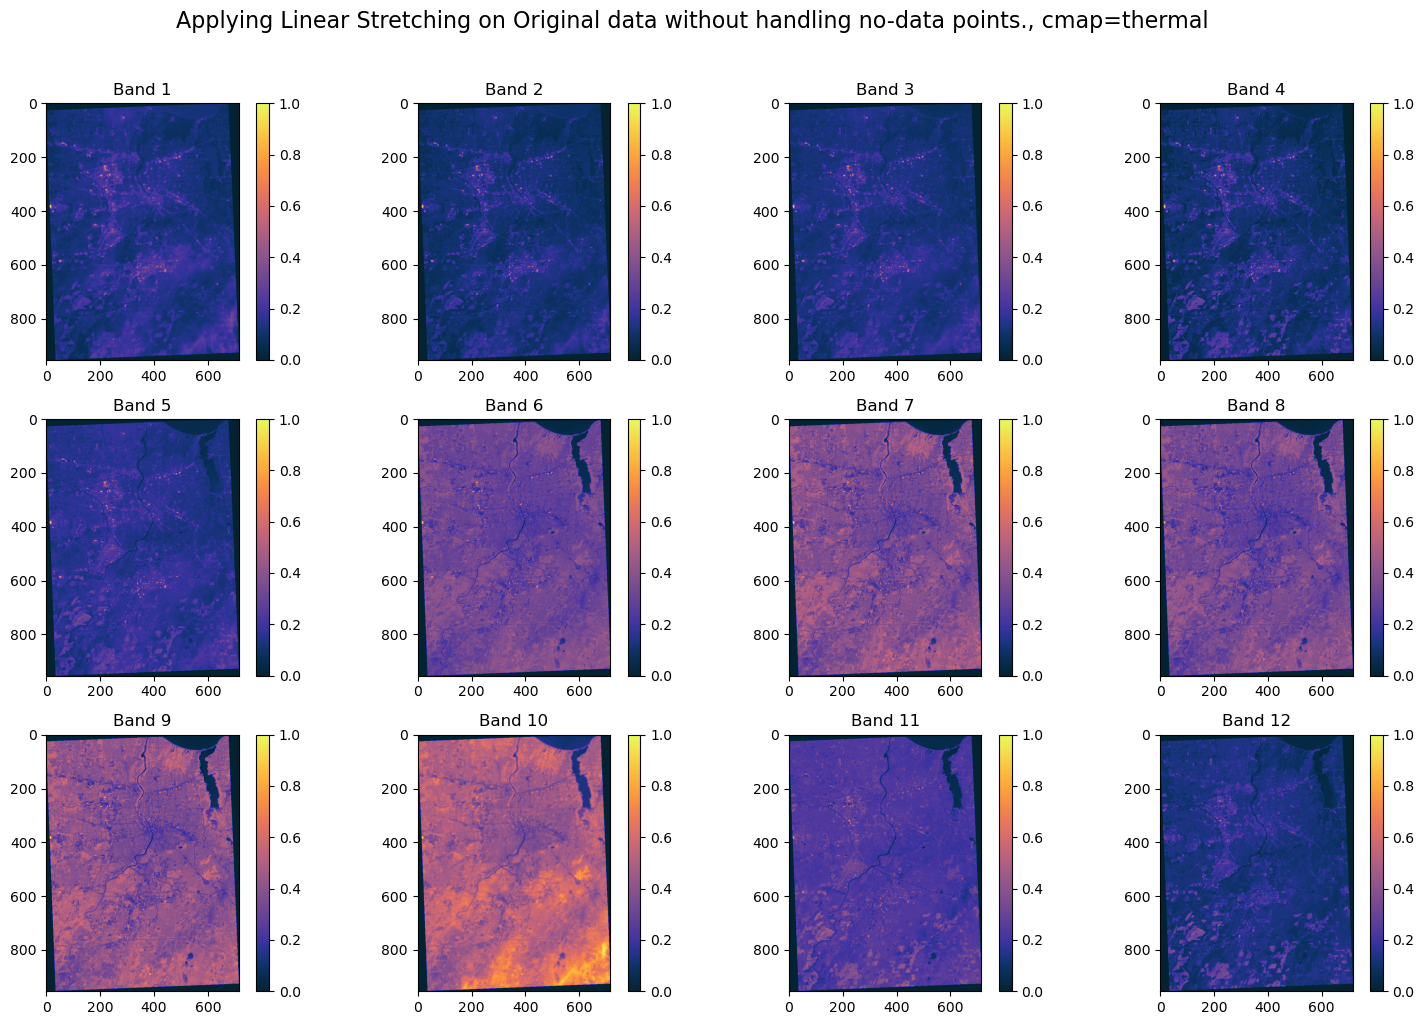

In [499]:
display_multispectral_data(lin_stretch_data, "Applying Linear Stretching on Original data without handling no-data points.", cmocean.cm.thermal)

Since there is no noticeable improvement even after applying linear stretching, let's examine the histograms after stretching.

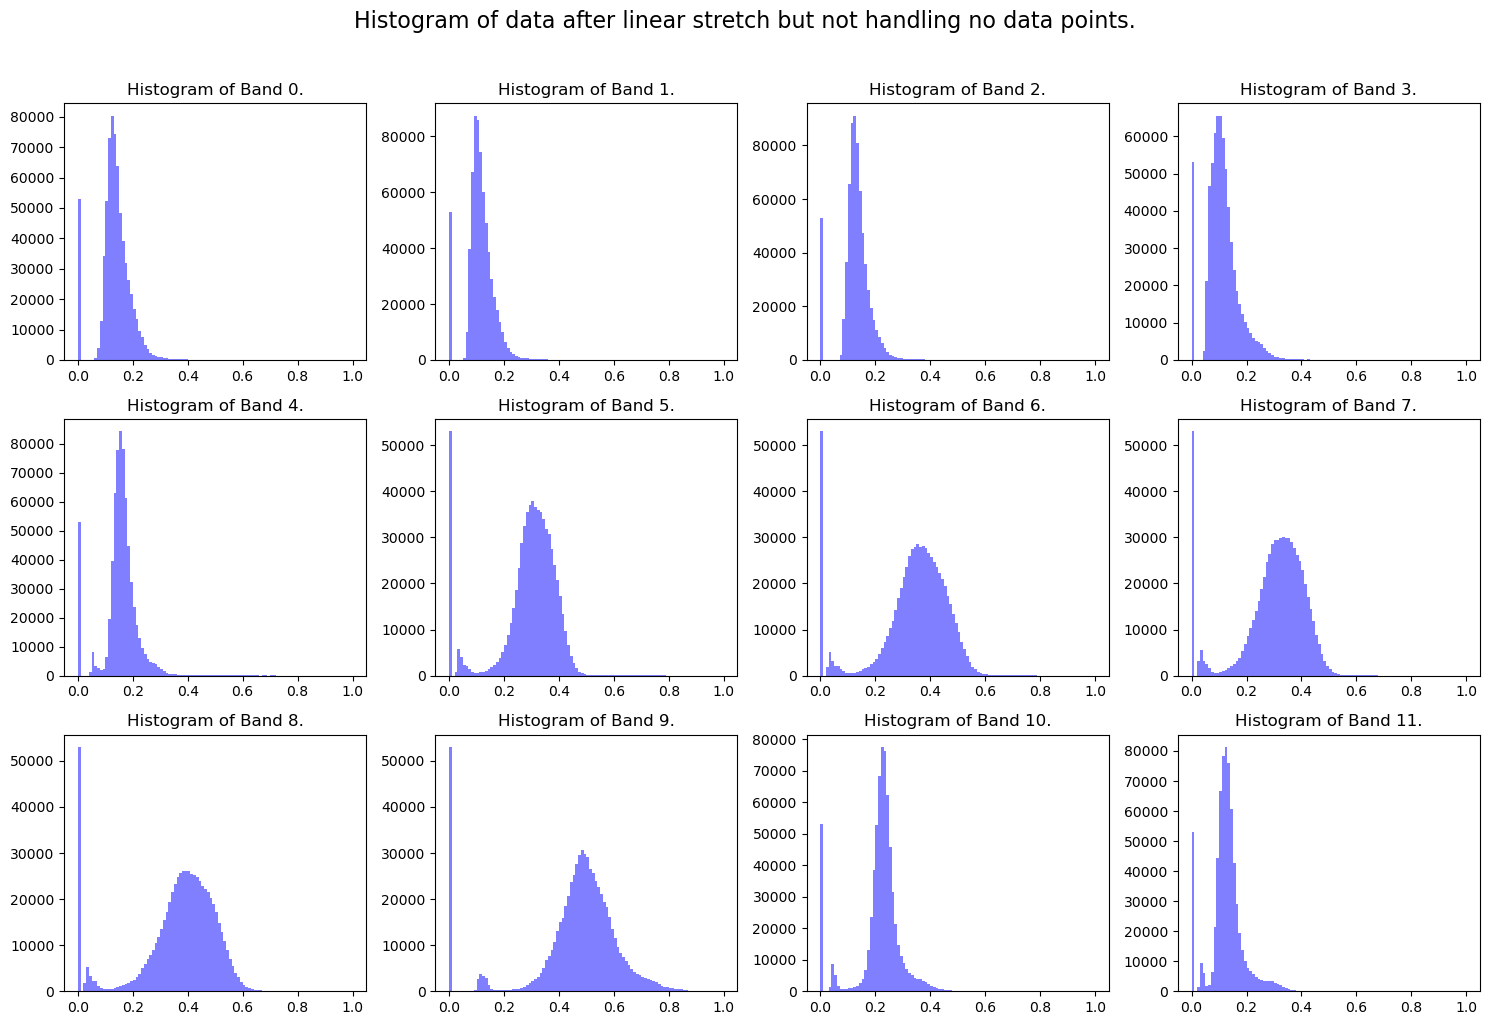

In [494]:
plot_histogram(lin_stretch_data, "Histogram of data after linear stretch but not handling no data points.")

As discussed above, there is no improvement in data visulaization because there are still 0 or no data points in our dataset. So let's handle this. A simple and easier way to do so is using "np.nan" function. np.nan in NumPy represents a Not-a-Number (NaN) value, which is used to indicate missing or undefined data in numerical arrays. Many NumPy functions, like np.nanmean(), np.nansum(), etc. can handle NaN values by ignoring them. It will be further seen in codes below while computing statistics of the data.

Let's create a copy of our original data and replace no data points with nan. and then observe the histogram.

In [233]:
# Create a copy of the original array
no_datapoint_handled_data = np.copy(sentinel2_rochester_data)

# Replace 0 values with NaN in the copied array
no_datapoint_handled_data[no_datapoint_handled_data == 0] = np.nan

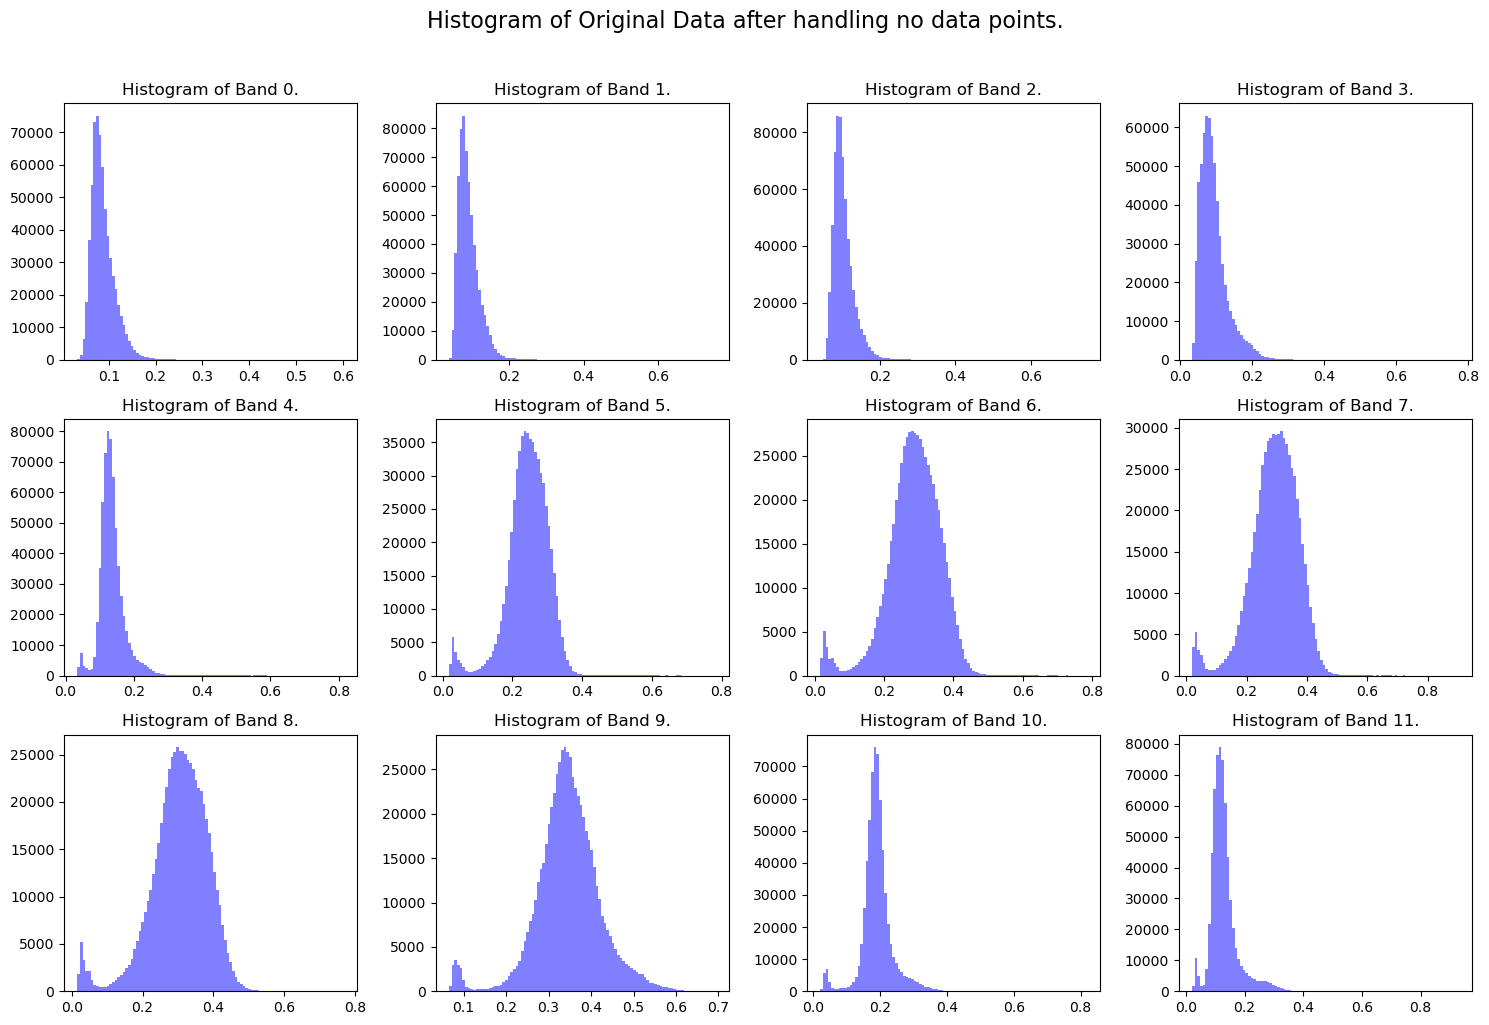

In [234]:
plot_histogram(no_datapoint_handled_data, "Histogram of Original Data after handling no data points.")

In [235]:
#Just another way to check if no data is handled by nan or not.
unique_values = np.unique(no_datapoint_handled_data[:,:,0])
print("Unique values in the dataset:", unique_values)

Unique values in the dataset: [0.0333 0.0345 0.035  ... 0.5929 0.6021    nan]


Now, let's create another instance of the Stretching class using a copy of the original data with no-data values handled, and then apply linear stretching.

In [236]:
#Now let's try linear stretching on this data.
instance2 = Stretching(no_datapoint_handled_data)  #Create an instance or object of class Stretching. (to test original data after handling 0 values)

lin_stretch_data_cleaned = instance2.linear_stretch()


In [495]:
#Check no. of valid data points apart from nan values.
valid_data_count = np.count_nonzero(~np.isnan(lin_stretch_data_cleaned))
print("Number of valid data points:", valid_data_count)

Number of valid data points: 7560288


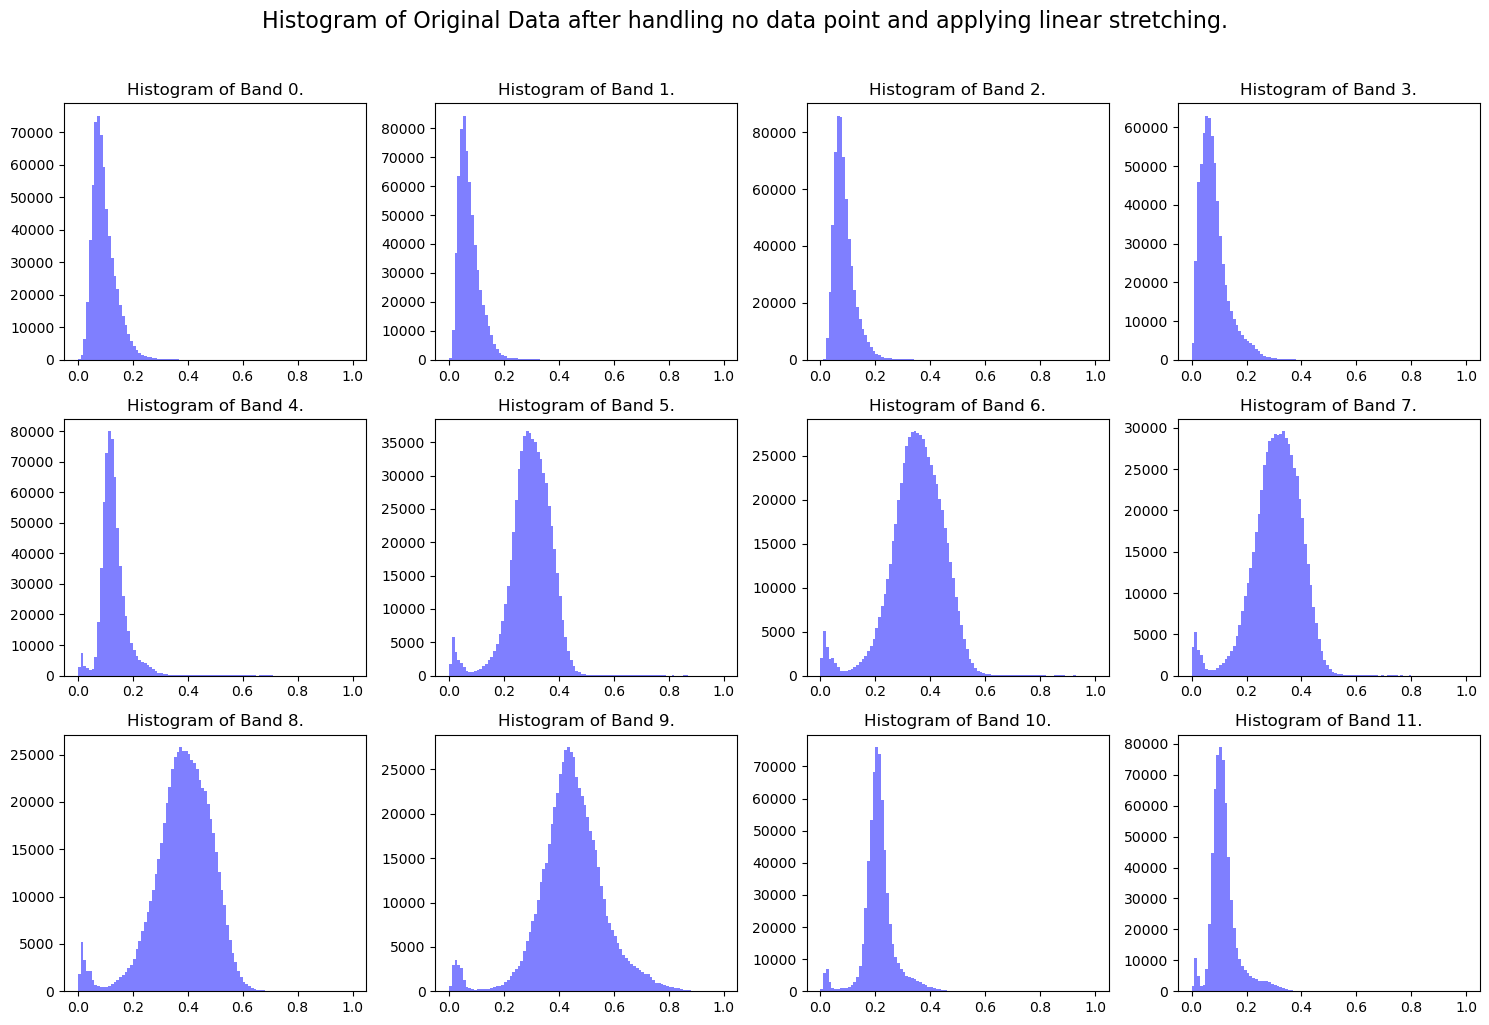

In [238]:
plot_histogram(lin_stretch_data_cleaned, "Histogram of Original Data after handling no data point and applying linear stretching.")

In [498]:
#Checking if there are any values near extreme points cause in histogram as it looks like only few such points are there.
near_count = np.sum(lin_stretch_data_cleaned[:,:,0] >= 0.9)
print(near_count)

40


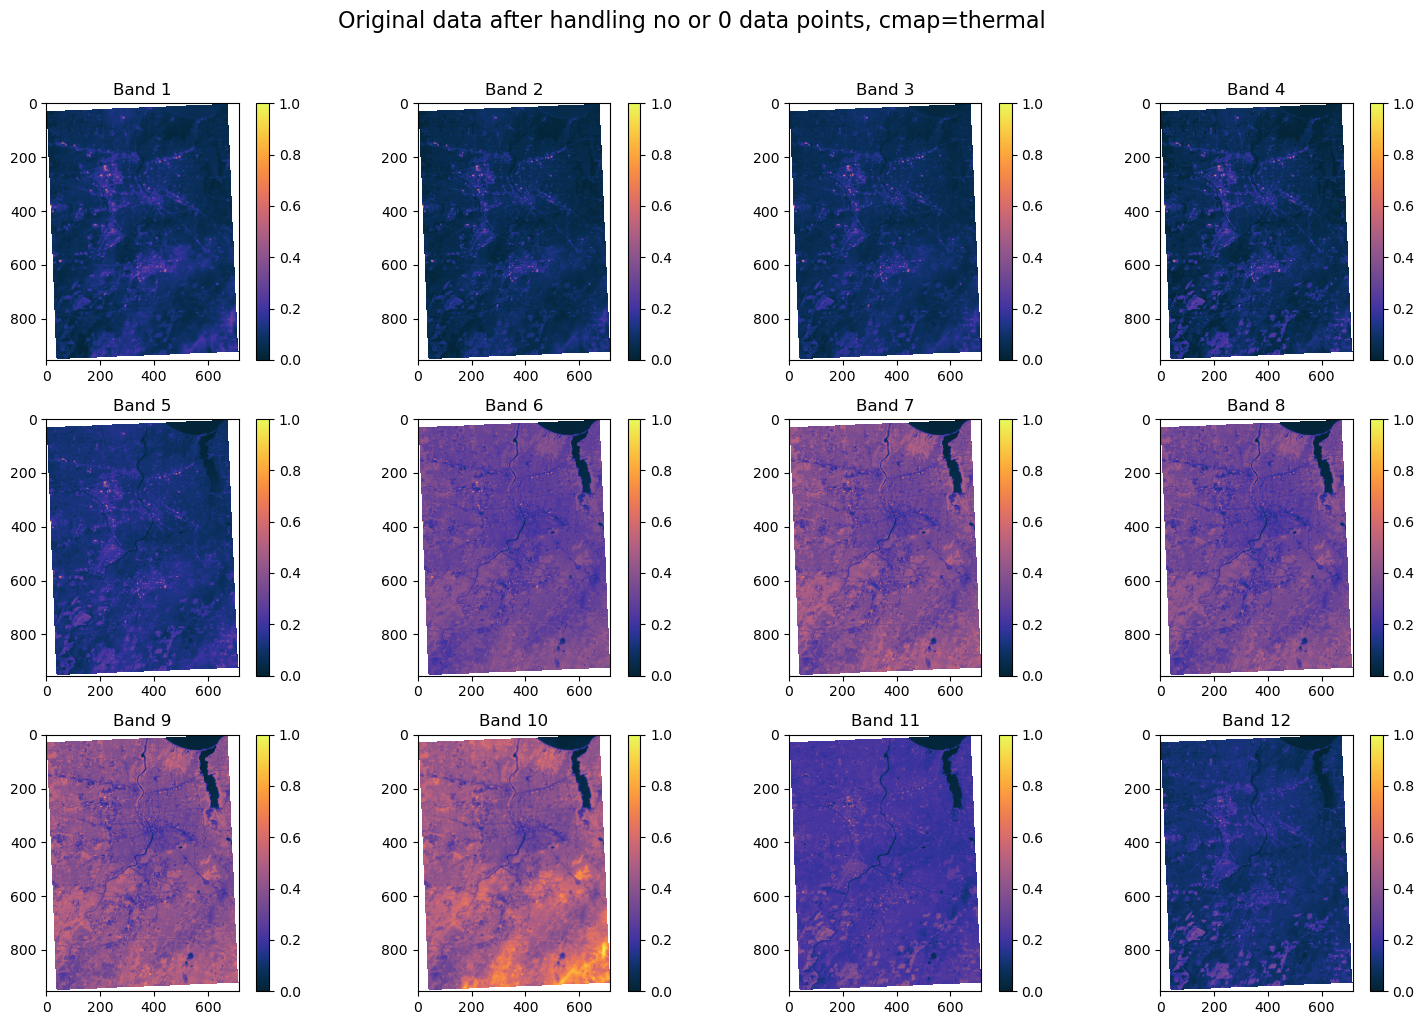

In [497]:
display_multispectral_data(lin_stretch_data_cleaned, "Original data after handling no or 0 data points and applying linear stretching.", cmocean.cm.thermal)

Here, we observe that the no-data points have been removed and are visible along the borders. Applying linear stretching has further enhanced the contrast in each band. Therefore, handling no-data points and applying stretching are crucial steps for properly visualizing the data

# Problem 2(a):
Calculate band statistics.

The following function calculate_band_statistics takes only one band as input and returns statistics of one band whereas another function calculate_band_statistics_multispec_data takes a multispectral data as input and returns statistics of each band.

In [276]:
def calculate_band_statistics(dataset):
    """
    This function takes input as one band and displays stat of one band.
    :param dataset: dataset
    :return: various metrics like mean, median, etc. We can also directly display using this function or return all such metrics and print later as shown below.
    """

    dataset_flatten = dataset.flatten()  #for easier calculations

    # here np.nanmean is used instead of np.mean which handles nan values in data
    #Similar approach has been applied for other metrics as well.
    mean = np.nanmean(dataset_flatten)
    std = np.nanstd(dataset_flatten)
    minimum = np.nanmin(dataset_flatten)
    maximum = np.nanmax(dataset_flatten)

    q1 = np.nanpercentile(dataset_flatten, 25)
    median = np.nanpercentile(dataset_flatten, 50)
    q3 = np.nanpercentile(dataset_flatten, 75)

    skewness = skew(dataset_flatten, nan_policy= 'omit')
    kurt = kurtosis(dataset_flatten, nan_policy= 'omit')

    return{
        'mean' : mean,
        'std' : std,
        'minimum' : minimum,
        'maximum' : maximum,
        'q1' : q1,
        'median' : median,
        'skewness' : skewness,
        'kurtosis' : kurt
    }


In [277]:
#Band statistics of band 0 of original data.
stat_band_1_original_data = calculate_band_statistics(sentinel2_rochester_data[:,:,0])
print(stat_band_1_original_data)

{'mean': np.float64(0.08179556908283851), 'std': np.float64(0.03580408667550343), 'minimum': np.float64(0.0), 'maximum': np.float64(0.6021000000000001), 'q1': np.float64(0.06760000000000001), 'median': np.float64(0.08080000000000001), 'skewness': np.float64(0.6806724480884334), 'kurtosis': np.float64(9.354110663027486)}


In [273]:
def calculate_band_statistics_mulspec_data(dataset):
    """
    This function takes argument as a multispectral dataset and displays stats of each band.
    :param dataset: multispectral dataset
    :return: various metrics like mean, median, etc for each band
    """
    stat = {}
    number_of_bands = dataset.shape[2]

    for i in range(number_of_bands):

        dataset_flatten = dataset[:,:,i].flatten()  #for easier calculations

        #In following codes, instead of np.mean or other metrics, use np.nanmean which handles nan values during computation.
        mean = np.nanmean(dataset_flatten)
        std = np.nanstd(dataset_flatten)
        minimum = np.nanmin(dataset_flatten)
        maximum = np.nanmax(dataset_flatten)

        q1 = np.nanpercentile(dataset_flatten, 25)
        median = np.nanpercentile(dataset_flatten, 50)
        q3 = np.nanpercentile(dataset_flatten, 75)

        skewness = skew(dataset_flatten, nan_policy='omit')
        kurt = kurtosis(dataset_flatten, nan_policy='omit')

        # Store statistics for the band
        stat[f'Band_{i + 1}'] = {
            'mean': mean,
            'std': std,
            'minimum': minimum,
            'maximum': maximum,
            'q1': q1,
            'median': median,
            'q3': q3,
            'skewness': skewness,
            'kurtosis': kurt
        }

        # Printing the statistics with a line gap after each band
        print(f"Statistics for Band {i + 1}:")
        for y, value in stat[f'Band_{i + 1}'].items():
            print(f"{y}: {value}")
        print()  # Blank line after each band’s statistics

    return stat



In [274]:
calculate_band_statistics_mulspec_data(sentinel2_rochester_data)


Statistics for Band 1:
mean: 0.08179556908283851
std: 0.03580408667550343
minimum: 0.0
maximum: 0.6021000000000001
q1: 0.06760000000000001
median: 0.08080000000000001
q3: 0.09860000000000001
skewness: 0.6806724480884334
kurtosis: 9.354110663027486

Statistics for Band 2:
mean: 0.0853557135202558
std: 0.04175320001273609
minimum: 0.0
maximum: 0.7542
q1: 0.0679
median: 0.0828
q3: 0.10310000000000001
skewness: 2.1096106282476637
kurtosis: 21.149475816074553

Statistics for Band 3:
mean: 0.09730412011173183
std: 0.04343220836029374
minimum: 0.0
maximum: 0.7484000000000001
q1: 0.08220000000000001
median: 0.0964
q3: 0.11470000000000001
skewness: 1.603611077222912
kurtosis: 18.5181096490366

Statistics for Band 4:
mean: 0.08698780216787887
std: 0.04959607835467897
minimum: 0.0
maximum: 0.7728
q1: 0.0611
median: 0.0818
q3: 0.10650000000000001
skewness: 2.0585663425317557
kurtosis: 14.821312815080482

Statistics for Band 5:
mean: 0.12610485796352905
std: 0.05368529627859451
minimum: 0.0
maximum

{'Band_1': {'mean': np.float64(0.08179556908283851),
  'std': np.float64(0.03580408667550343),
  'minimum': np.float64(0.0),
  'maximum': np.float64(0.6021000000000001),
  'q1': np.float64(0.06760000000000001),
  'median': np.float64(0.08080000000000001),
  'q3': np.float64(0.09860000000000001),
  'skewness': np.float64(0.6806724480884334),
  'kurtosis': np.float64(9.354110663027486)},
 'Band_2': {'mean': np.float64(0.0853557135202558),
  'std': np.float64(0.04175320001273609),
  'minimum': np.float64(0.0),
  'maximum': np.float64(0.7542),
  'q1': np.float64(0.0679),
  'median': np.float64(0.0828),
  'q3': np.float64(0.10310000000000001),
  'skewness': np.float64(2.1096106282476637),
  'kurtosis': np.float64(21.149475816074553)},
 'Band_3': {'mean': np.float64(0.09730412011173183),
  'std': np.float64(0.04343220836029374),
  'minimum': np.float64(0.0),
  'maximum': np.float64(0.7484000000000001),
  'q1': np.float64(0.08220000000000001),
  'median': np.float64(0.0964),
  'q3': np.float6

# Problem 2(b):
Standardization is a data processing technique to transform data to have a mean of 0 and standard deviation of 1. $$
X_{\text{standardized}} = \frac{X - \mu}{\sigma}
$$
Where:


X = Original pixel value,
𝜇
 = Mean of the band,
𝜎
 = Standard deviation of the band.

Standardization has several advantages. Some of them are discussed below.
 1. Brings Data to a Common Scale:
Multispectral bands can have different ranges of pixel values due to varying sensor sensitivity and atmospheric effects.
Standardization ensures all bands have comparable value distributions, preventing any band from dominating analysis due to a larger numerical range.
2. Improves Contrast & Visualization:
Standardizing enhances contrast in images, making patterns and differences between spectral bands more visible.
Histogram equalization and other visualization techniques benefit from standardized data.
3. Removes Bias from Uneven Distributions:
Some bands might have pixel values clustered in a small range, while others might be widely spread.
Standardization ensures each band contributes equally in analysis, avoiding bias from highly variable bands.
4. Essential for Machine Learning & Statistical Analysis:
Many ML models (e.g., PCA, clustering, classification algorithms) perform better when input data is standardized.
Non-standardized data can cause convergence issues in models like k-means clustering or logistic regression due to varying scales.


References: 1. https://builtin.com/data-science/when-and-why-standardize-your-data
2. https://atlan.com/standardize-data/ 3. ChatGPT





In [280]:
def standardize(dataset):

    """

    :param dataset: one band of multispectral data
    :return: standardized data i.e., standardized value for each pixel with same size as original data
    """
    mean = np.nanmean(dataset)
    std = np.nanstd(dataset)

    standardize_data = (dataset - mean)/std  #Direct vectorized operation

    return standardize_data

Let's visualize first band and all bands together after standardization.

In [505]:
data_standard_band0 = standardize(no_datapoint_handled_data[:,:,0])

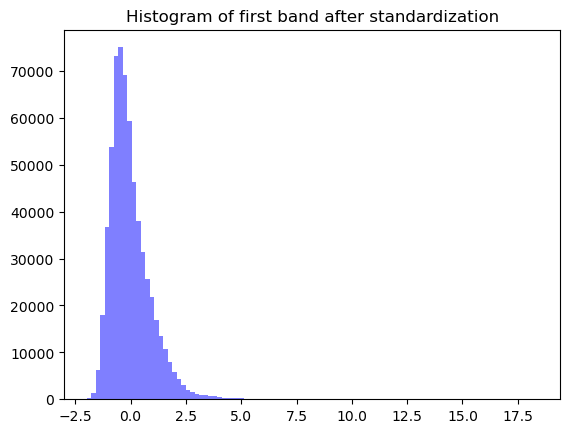

In [506]:
plt.hist(data_standard_band0.flatten(), bins=100, color='blue', alpha=0.5)
plt.title('Histogram of first band after standardization')
plt.show()

In [293]:
#Checking if there are any values near extreme points cause in histogram, it looks like only few such points are there.
near_count2 = np.sum(data_standard_band0 <= 3)
print(near_count2)

622932


Any values for a normal distribution, the standardized data will have most values within:

−1 to +1: About 68% of the data.

−2 to +2: About 95% of the data.

−3 to +3: About 99.7% of the data.

Z-scores below −3 or above +3 are considered outliers.



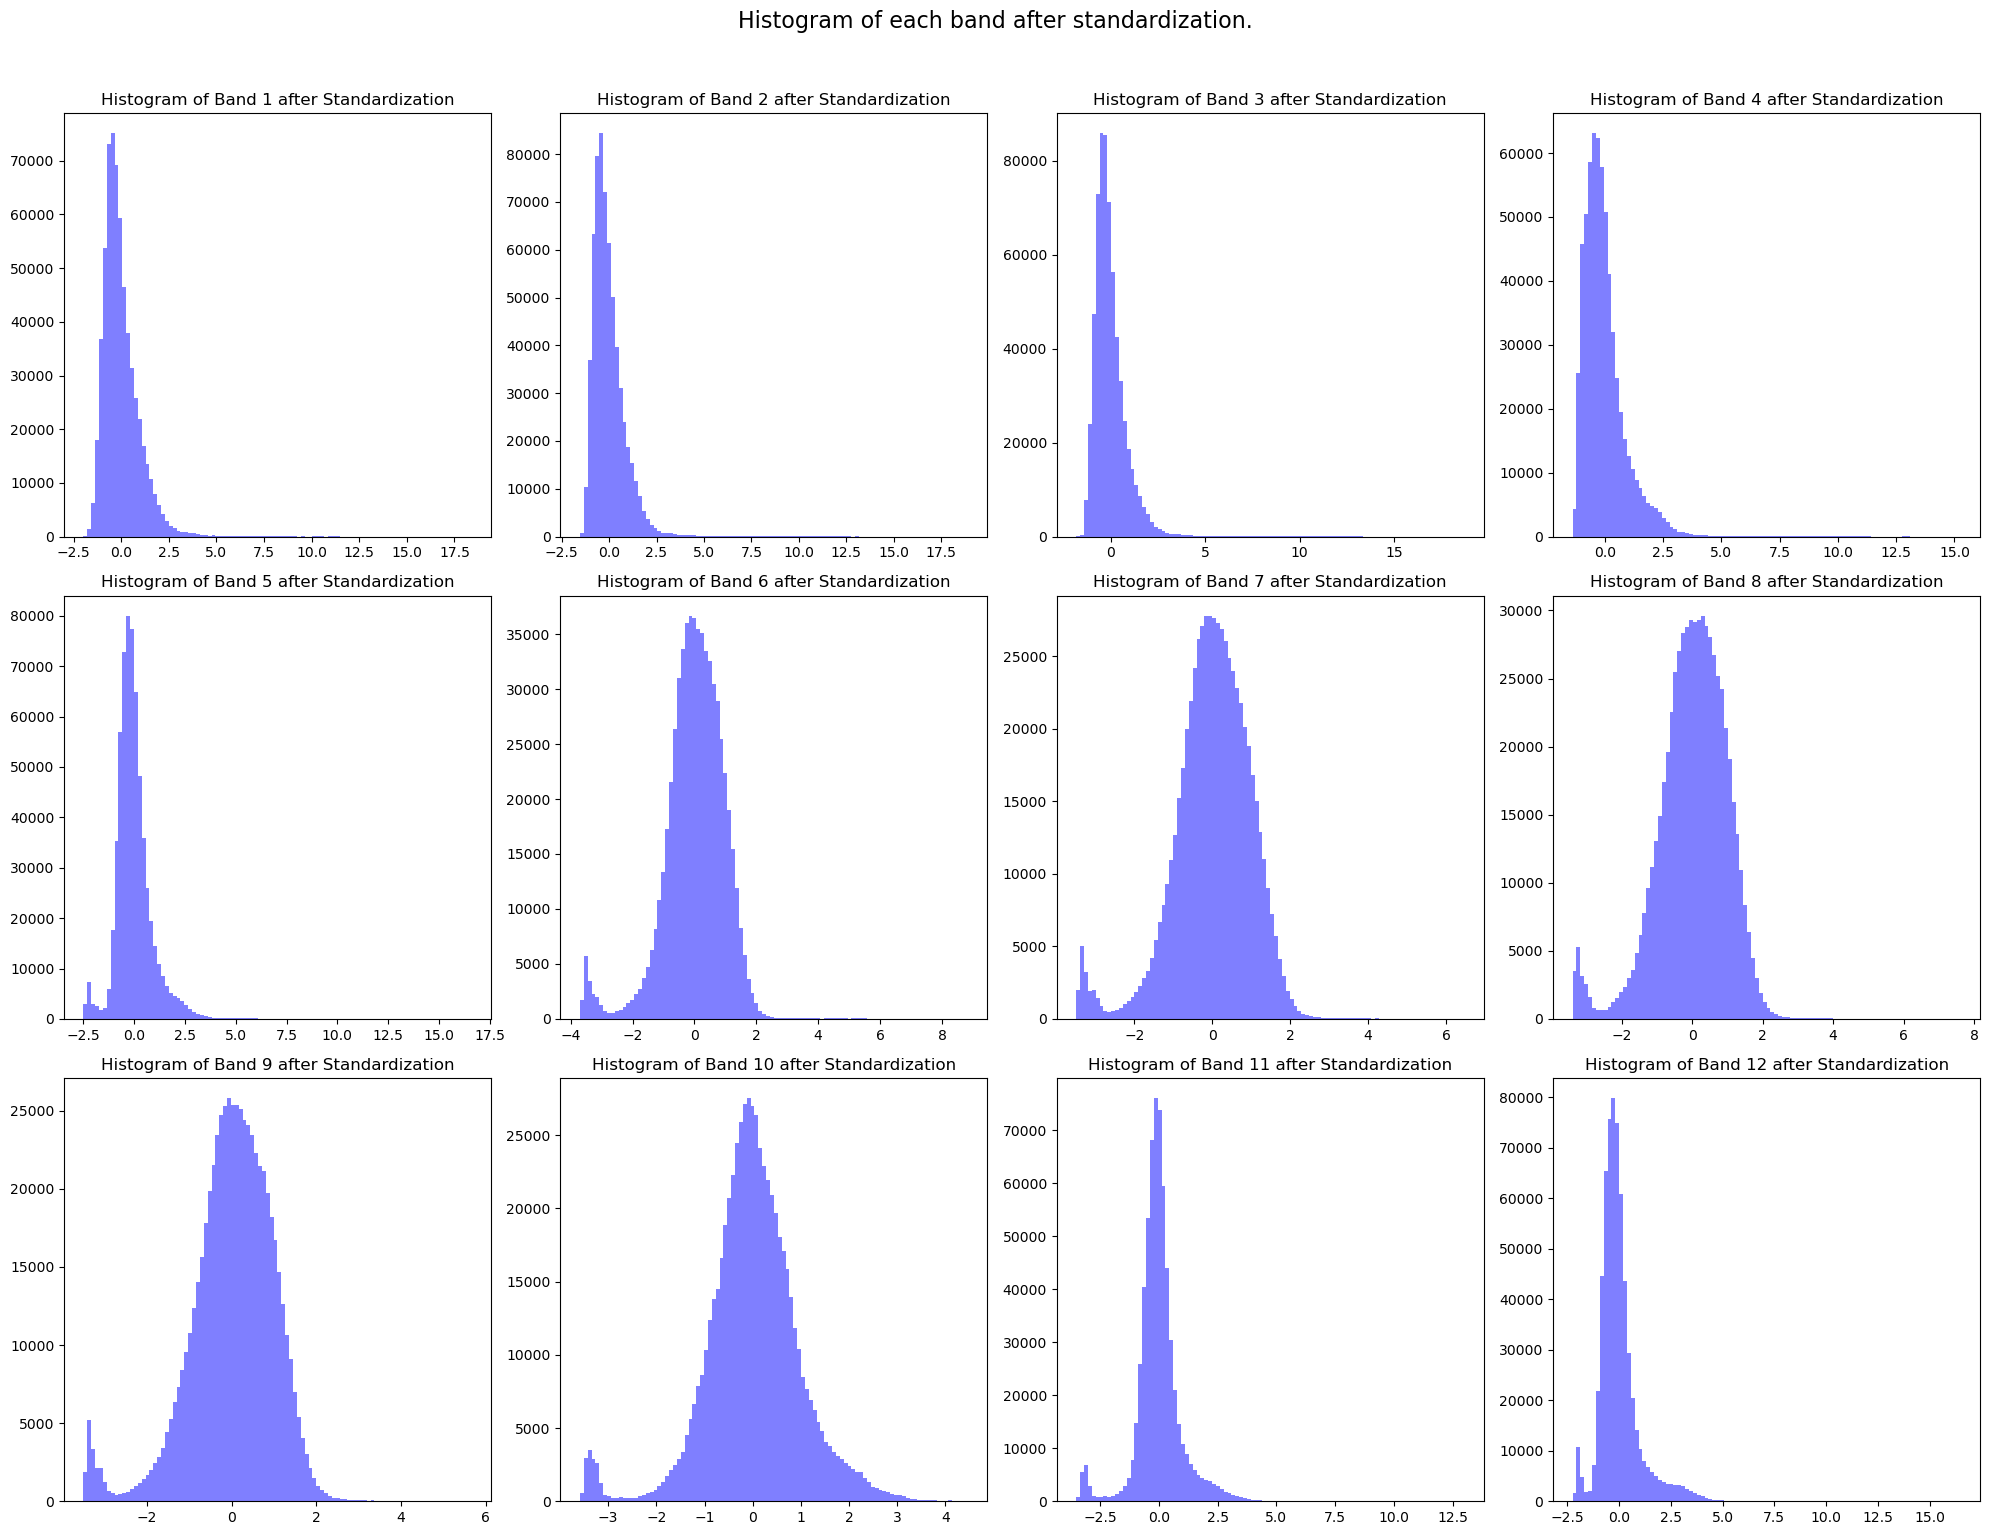

In [509]:
num_bands = no_datapoint_handled_data.shape[2]

# Set up the figure for subplots
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(20, 15))
axes = axes.flatten()  # Flatten the axes for easy indexing

plt.suptitle("Histogram of each band after standardization.", fontsize=16, y=1.02)

# Iterate over each band, standardize it, and plot the histogram
for i in range(num_bands):
    standardized_band = standardize(no_datapoint_handled_data[:, :, i])  # Standardize current band
    axes[i].hist(standardized_band.flatten(), bins=100, color='blue', alpha=0.5)
    axes[i].set_title(f'Histogram of Band {i+1} after Standardization')

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

# Problem 3:
Let's compute Pearson r correlation coefficient, to compute correlation matrix for all bands. The **Pearson correlation coefficient** (\(r\)) measures the strength and direction of the linear relationship between two variables. It ranges from **-1 to 1**, where:

- **1** indicates a **perfect positive linear relationship**.
- **-1** indicates a **perfect negative linear relationship**.
- **0** indicates **no linear relationship**.


In [516]:
def correlation_matrix_nan_safe(dataset):
    """
    Computes the correlation matrix for all bands in the multispectral dataset, handling NaN values.
    Plots the matrix as an image with correlation coefficient values displayed.

    :param dataset: A 3D array (rows, columns, bands) representing multispectral data.
    :return: The correlation matrix (2D array).
    """
    # Reshape the dataset: Each band is flattened into a 2D array where rows = pixels, cols = bands
    num_bands = dataset.shape[2]
    flattened_data = dataset.reshape(-1, num_bands)  # Shape: (num_pixels, num_bands)

    # Remove rows where all bands are NaN
    valid_data = flattened_data[~np.isnan(flattened_data).all(axis=1)]  # Keep rows with at least one non-NaN

    # Compute the correlation matrix while ignoring NaN values
    corr_matrix = np.ma.corrcoef(np.ma.masked_invalid(valid_data), rowvar=False)

    # Plot the correlation matrix as an image
    fig, ax = plt.subplots(figsize=(8, 6))
    cax = ax.imshow(corr_matrix, cmap='jet', interpolation='none', aspect='auto')

    # Add colorbar
    plt.colorbar(cax, label="Correlation Coefficient (r)")

    # Set title and labels
    plt.title("Correlation Matrix of Bands (NaN-Handled)")
    plt.xlabel("Bands")
    plt.ylabel("Bands")

    # Set tick labels
    band_labels = [f"Band {i+1}" for i in range(num_bands)]
    ax.set_xticks(range(num_bands))
    ax.set_xticklabels(band_labels, rotation=45)
    ax.set_yticks(range(num_bands))
    ax.set_yticklabels(band_labels)

    # Display correlation coefficients on the heatmap
    for i in range(num_bands):
        for j in range(num_bands):
            ax.text(j, i, f"{corr_matrix[i, j]:.2f}", ha='center', va='center', color='black', fontsize=10, fontweight='bold')

    plt.grid(False)
    plt.show()

    return corr_matrix


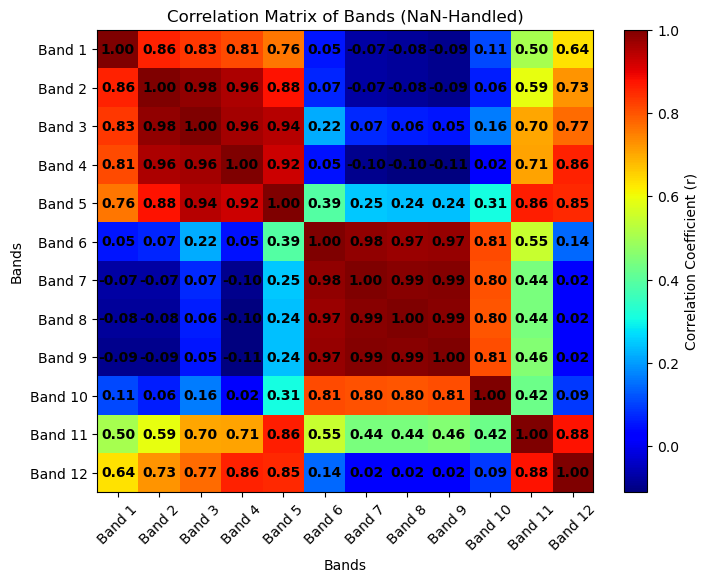

masked_array(
  data=[[1.0, 0.85750903959655, 0.8324385735212295, 0.8103060573898555,
         0.7584872984484442, 0.054128604055998, -0.0716813627494298,
         -0.08151990550531577, -0.09229309810105432, 0.10861077862163154,
         0.5048668145375714, 0.6352174538653761],
        [0.85750903959655, 1.0, 0.9793847597329061, 0.9557587330486372,
         0.878667212151315, 0.07279528601162415, -0.07003027973895462,
         -0.08185211250241507, -0.09260357934065462, 0.06342381071210945,
         0.5922469649841998, 0.7261908543867323],
        [0.8324385735212295, 0.9793847597329061, 1.0, 0.962361792170422,
         0.9445467380744939, 0.22019879758091426, 0.073486871067753,
         0.06372962228760014, 0.052789658806298136, 0.16460206429256033,
         0.7016504019884836, 0.7746847748123714],
        [0.8103060573898555, 0.9557587330486372, 0.962361792170422, 1.0,
         0.9248126831454199, 0.050836020826177386, -0.09540027158227768,
         -0.10469975212617111, -0.108852429

In [517]:
correlation_matrix_nan_safe(no_datapoint_handled_data)

For the 10-meter bands (B2, B3, B4, and B8) let's define a function that displays a pairwise scatter plot between every two vectors, and the density of scatter plot points in the scatter plot side by side. A pairwise scatter plot shows the relationship between each pair of variables in a dataset. A density scatter plot visualizes the relationship between two variables, but with the additional feature of density. It shows the concentration of data points at different values in the scatter plot. We will be using hexbin plot to show density plot.

In [317]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations

def scatter_and_density_plots4(dataset, band_indices=[1, 2, 3, 7]):
    """
    Creates subplots:
    - Scatter plots using plt.scatter for 10m band pairs.
    - Density plots using hexbin for concentration visualization.

    Two band pairs are shown per row.

    :param dataset: A 3D array (rows, columns, bands) representing multispectral data.
    :param band_indices: Indices of the 10-meter resolution bands in the dataset.
    """

    band_names = ["B2 (Blue)", "B3 (Green)", "B4 (Red)", "B8 (NIR)"]
    pairs = list(combinations(range(len(band_indices)), 2))  # Generate band pairs

    nrows = (len(pairs) + 1) // 2  # Arrange 2 pairs per row
    fig, axes = plt.subplots(nrows, 4, figsize=(16, 5 * nrows))

    for idx, (i, j) in enumerate(pairs):
        row, col = divmod(idx, 2)  # Get row and column for layout

        band_x = dataset[:, :, band_indices[i]].flatten()
        band_y = dataset[:, :, band_indices[j]].flatten()

        # Remove NaNs
        mask = ~np.isnan(band_x) & ~np.isnan(band_y)
        band_x, band_y = band_x[mask], band_y[mask]

        # Scatter Plot
        ax1 = axes[row, col * 2]
        ax1.scatter(band_x, band_y, alpha=0.3, s=1, color="blue")
        ax1.set_xlabel(band_names[i])
        ax1.set_ylabel(band_names[j])
        ax1.set_title(f"Scatter: {band_names[i]} vs {band_names[j]}")

        # Hexbin Density Plot
        ax2 = axes[row, col * 2 + 1]
        hb = ax2.hexbin(band_x, band_y, gridsize=50, cmap='inferno', mincnt=1)
        ax2.set_xlabel(band_names[i])
        ax2.set_ylabel(band_names[j])
        ax2.set_title(f"Density: {band_names[i]} vs {band_names[j]}")
        plt.colorbar(hb, ax=ax2, label="Point Density")

    plt.tight_layout()
    plt.show()


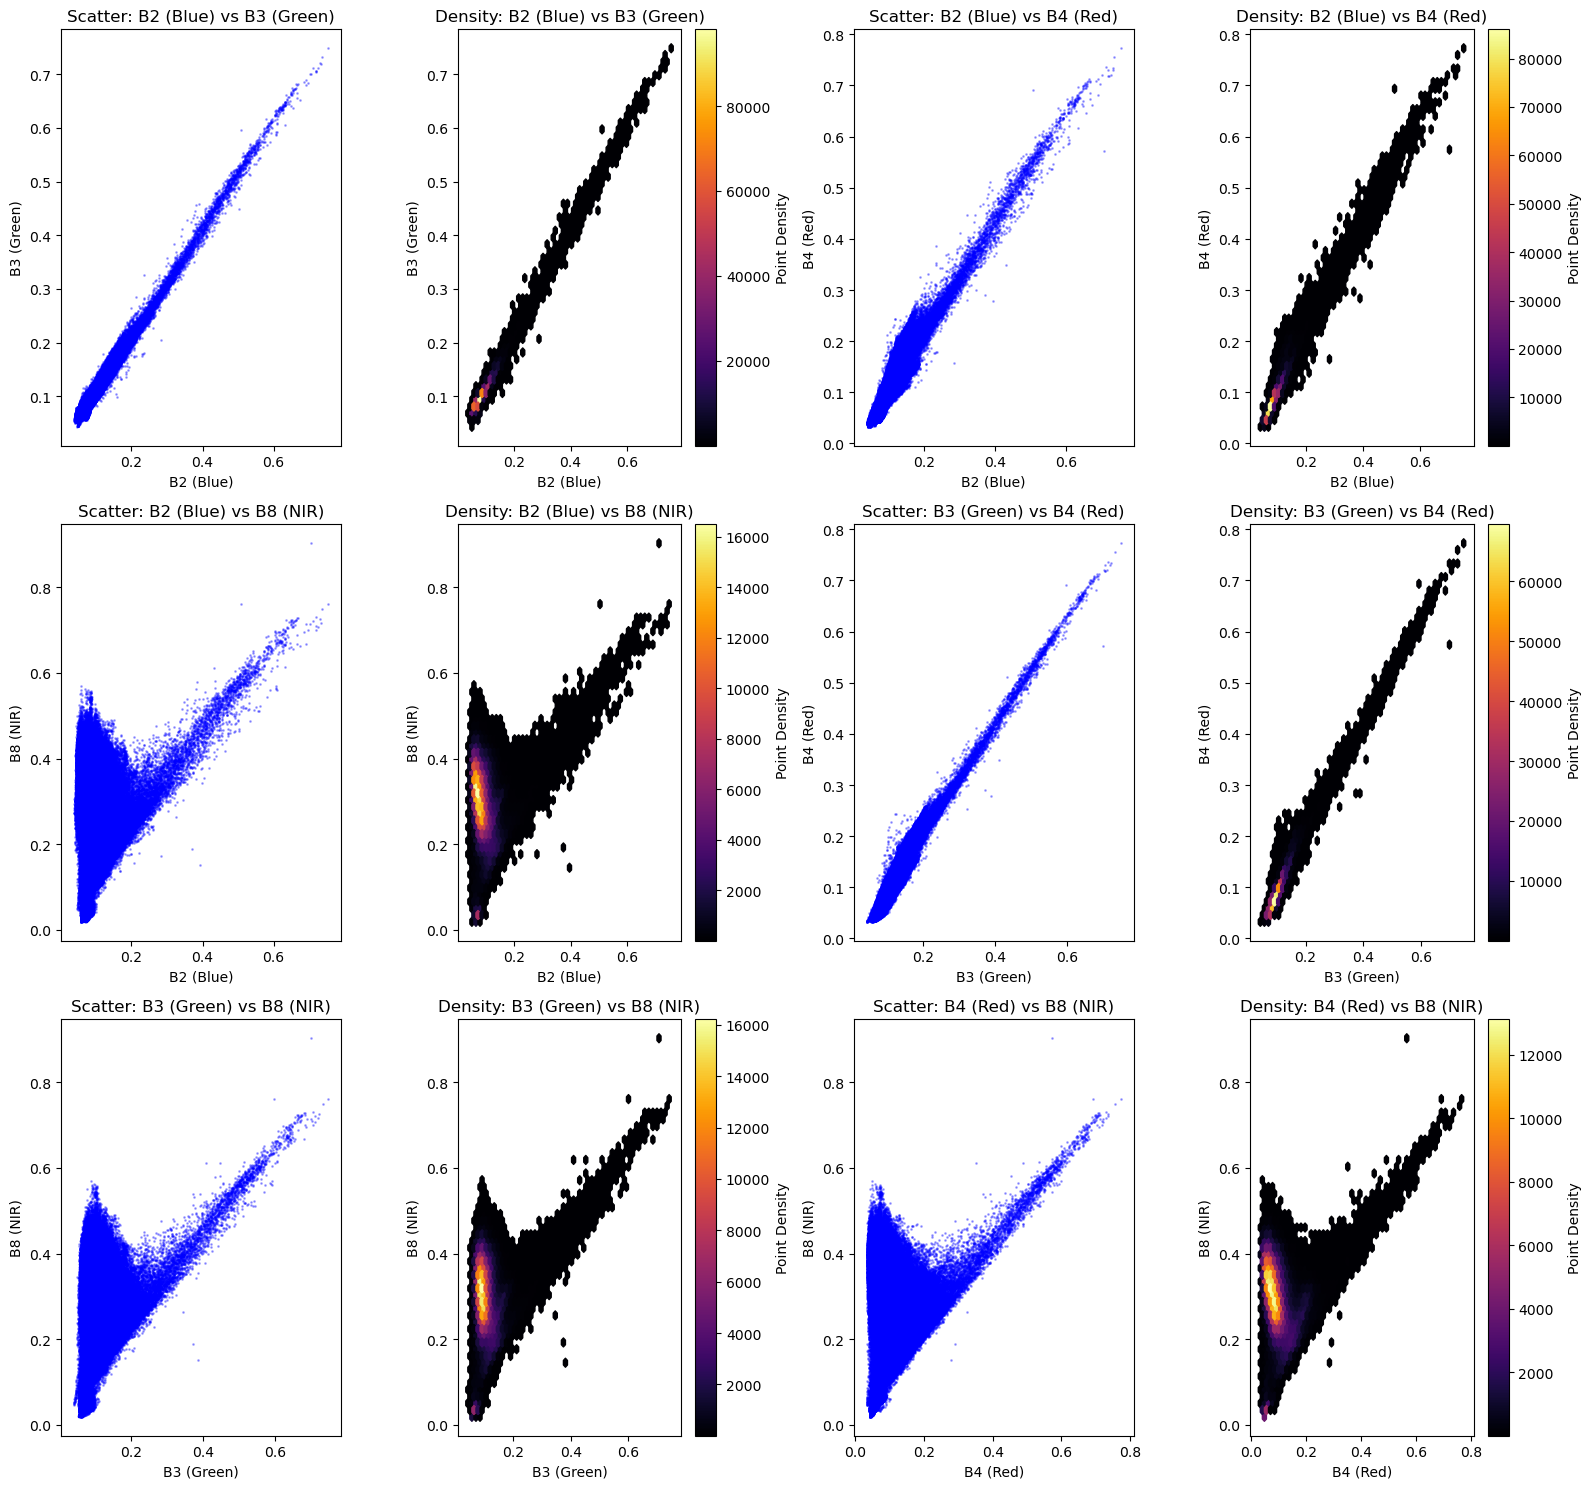

In [318]:
scatter_and_density_plots4(no_datapoint_handled_data)

# Problem 4

In [534]:
#Read the reflectance files of asphalt and quercus

asphalt = pd.read_csv('asphalt.txt', delim_whitespace=True, header=None)
asphalt.columns = ['Wavelength', 'Reflectance'] + list(asphalt.columns[2:])  #list(df.columns[2:] preserves all other columns beyond the first two columns, avoiding accidental data loss or renaming of other columns.
asphalt['Reflectance'] = pd.to_numeric(asphalt['Reflectance'], errors = 'coerce') / 100
#pd.to_numeric handles non-numeric values safely
#errors = 'coerce' handles "NA" or "unknown" values

quercus = pd.read_csv('quercus.txt', delim_whitespace=True, header=None)
quercus.columns = ['Wavelength', 'Reflectance'] + list(quercus.columns[2:])
quercus['Reflectance'] = pd.to_numeric(quercus['Reflectance'], errors = 'coerce') / 100

C:\Users\Usuario\AppData\Local\Temp\ipykernel_33180\1749058711.py:3: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  asphalt = pd.read_csv('asphalt.txt', delim_whitespace=True, header=None)
C:\Users\Usuario\AppData\Local\Temp\ipykernel_33180\1749058711.py:9: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  quercus = pd.read_csv('quercus.txt', delim_whitespace=True, header=None)


In [537]:
asphalt.head()

Wavelength  Reflectance
0       0.300       0.0594
1       0.302       0.0595
2       0.304       0.0597
3       0.306       0.0599
4       0.308       0.0600

In [538]:
quercus.head()

Wavelength  Reflectance
0       0.350      0.06011
1       0.351      0.06007
2       0.352      0.06016
3       0.353      0.05932
4       0.354      0.05753

As instructed, we will remove the atmospheric compensation bands from the original data. Specifically, we will remove the bands corresponding to 443 nm and 940 nm (water bands), which are the first and tenth bands in our dataset. Since the tenth band has already been excluded, we will remove the ninth band in the original Sentinel-2 data, which corresponds to the tenth band in our dataset.

In [330]:
#let's call the new data filtered data after removing band 0 and 9.
filtered_data = np.delete(no_datapoint_handled_data, [0,9], axis =2 )

In [331]:
filtered_data.shape

(954, 716, 10)

In [332]:
#filtered original data has now following bands only
filtered_data_wavelength = np.array([492.7, 559.8, 664.6, 704.1, 740.5, 782.8, 832.8, 864.7, 1613.7, 2202.4])

Be careful with the units while downsampling. Convert asphalt wavelengths from μm to nm since ECOSTRESS data has wavelength in um and Sentinel has in nm. If not converted, all downsampled values might have same reflectance values because of inappropriate scaling and interpolation.

In [385]:
#Downsample asphalt and quercus data
# Convert asphalt wavelengths from μm to nm since ECOSTRESS data has wavelength in um and Sentinel has in nm.

asphalt_wavelength_nm = asphalt['Wavelength'] * 1000  #multiply by 1000 to convert um into nm.
downsampled_asphalt_np = np.interp(filtered_data_wavelength, asphalt_wavelength_nm, asphalt['Reflectance'])
downsampled_asphalt_df = pd.DataFrame({"Wavelength": filtered_data_wavelength, "Reflectance": downsampled_asphalt_np})

quercus_wavelength_nm = quercus['Wavelength'] * 1000
downsampled_quercus_np = np.interp(filtered_data_wavelength, quercus_wavelength_nm, quercus['Reflectance'])
downsampled_quercus_df = pd.DataFrame({"Wavelength": filtered_data_wavelength, "Reflectance": downsampled_quercus_np})

In [386]:
print(downsampled_asphalt_np)

[0.07237   0.07619   0.07963   0.0806    0.081425  0.0822    0.082828
 0.083476  0.0835685 0.080276 ]


In [387]:
downsampled_asphalt_df

Wavelength  Reflectance
0       492.7     0.072370
1       559.8     0.076190
2       664.6     0.079630
3       704.1     0.080600
4       740.5     0.081425
5       782.8     0.082200
6       832.8     0.082828
7       864.7     0.083476
8      1613.7     0.083568
9      2202.4     0.080276

In [388]:
downsampled_quercus_df

Wavelength  Reflectance
0       492.7     0.059110
1       559.8     0.105876
2       664.6     0.058712
3       704.1     0.133227
4       740.5     0.361350
5       782.8     0.394406
6       832.8     0.392828
7       864.7     0.392597
8      1613.7     0.258430
9      2202.4     0.150634

In [390]:
#create a function that calculates cosine similarity. i.e., use SAM (spectral angle mapper)

def sam(v1, v2):
    mask = (~np.isnan(v1)) & (~np.isnan(v2)) #to ignore nan values in the data
    if np.any(mask):  #np.any(mask) checks if at least one True value exists in the mask array.
        v1,v2 = v1[mask], v2[mask]
        return np.arccos(np.clip(np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2)), -1, 1))  #np.clip(..., -1, 1) prevents numerical errors due to floating point precision.
    else:
        return np.nan

In [391]:
num_pixels = filtered_data.shape[0] * filtered_data.shape[1]
reshaped_filtered_data = filtered_data.reshape(num_pixels, filtered_data.shape[2]) #reshape to (pixels, bands)

In [392]:
reshaped_filtered_data.shape

(683064, 10)

In [393]:
#Calculate SAM scores w.r.t. both asphalt and quercus as target spectra.

asphalt_sam_scores = np.array([sam(pixel,downsampled_asphalt_np) for pixel in reshaped_filtered_data])
quercus_sam_scores = np.array([sam(pixel,downsampled_quercus_np) for pixel in reshaped_filtered_data])

In [394]:
#Check if SAM is done properly or not by checking number of scores match exactly with no. of pixels in data.
asphalt_sam_scores.shape

(683064,)

In [408]:
#Checking if the computed values are within range.

max_value = np.nanmax(asphalt_sam_scores)
min_value = np.nanmin(asphalt_sam_scores)

print(f"Max value (ignoring NaNs): {max_value}")
print(f"Min value (ignoring NaNs): {min_value}")

Max value (ignoring NaNs): 0.6516754949825728
Min value (ignoring NaNs): 0.009519662477459473


In [409]:
#Confirming the index of closet match (or lowest SAM score) matches after sorting in code block below (after this cell).
min_index = np.nanargmin(asphalt_sam_scores)  # Index of the minimum value, ignoring NaNs
max_index = np.nanargmax(asphalt_sam_scores)  # Index of the maximum value, ignoring NaNs

print(f"Index of min value (ignoring NaNs): {min_index}")
print(f"Index of max value (ignoring NaNs): {max_index}")

Index of min value (ignoring NaNs): 343212
Index of max value (ignoring NaNs): 42167


In [395]:
#Sort the SAM scores from asphalt_sam_scores and find the 100  closest matches (sort the lowest scores)
top_n = 100
best_match_indices_asp = np.argsort(asphalt_sam_scores)[:top_n]  # Indices of lowest spectral angles for asphalt

first_match_asp = reshaped_filtered_data[best_match_indices_asp[0]]
fiftieth_match_asp = reshaped_filtered_data[best_match_indices_asp[49]]
hundredth_match_asp = reshaped_filtered_data[best_match_indices_asp[99]]

#same process for quercus
best_match_indices_qs = np.argsort(quercus_sam_scores)[:top_n]  # Indices of lowest spectral angles for quercus

first_match_qs = reshaped_filtered_data[best_match_indices_qs[0]]
fiftieth_match_qs = reshaped_filtered_data[best_match_indices_qs[49]]
hundredth_match_qs = reshaped_filtered_data[best_match_indices_qs[99]]

In [404]:
#Confirm whether the closet match (lowest score) after sorting matches with the index of min. SAM value as in one code block above.
best_match_indices_asp[0]

np.int64(343212)

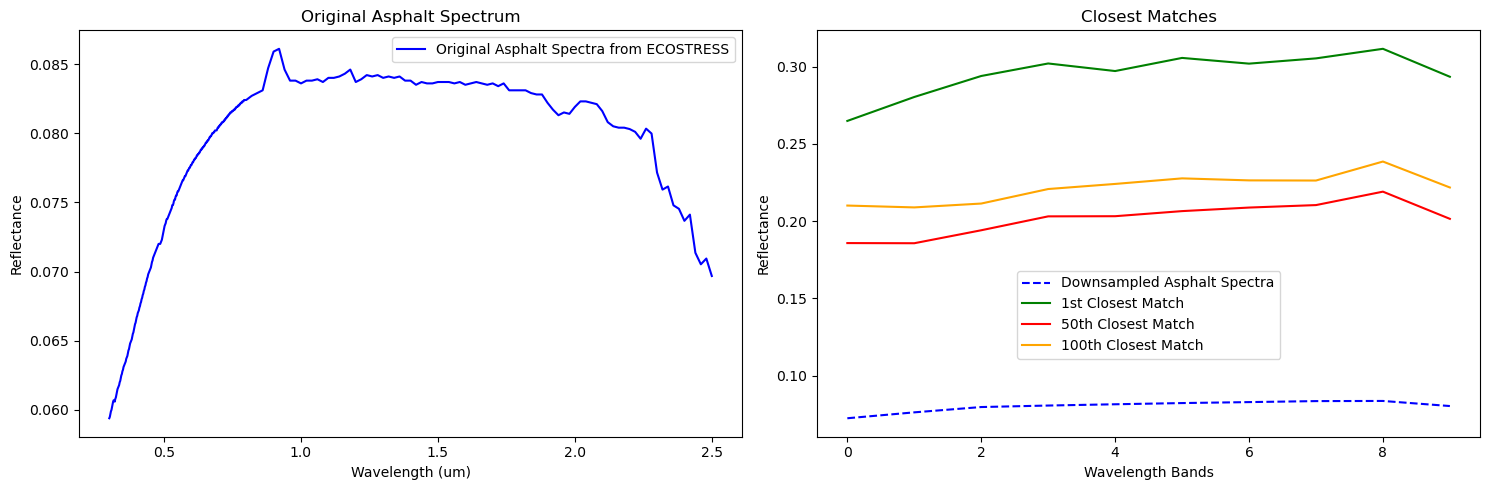

In [424]:
#Plot the asphalt Spectra

# Create a figure with 2 subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Subplot 1: Plot original asphalt spectrum
axes[0].plot(asphalt['Wavelength'].iloc[:336], asphalt['Reflectance'].iloc[:336], label="Original Asphalt Spectra from ECOSTRESS", color='b') # showing only upto index 336 because it is a range 0.3-2.5um
axes[0].set_title("Original Asphalt Spectrum")
axes[0].set_xlabel("Wavelength (um)")
axes[0].set_ylabel("Reflectance")
axes[0].legend()

# Subplot 2: Plot 1st, 50th, and 100th closest spectra
axes[1].plot(downsampled_asphalt_np, label="Downsampled Asphalt Spectra", color='b', linestyle ='--')
axes[1].plot(first_match_asp, label="1st Closest Match", color='g')
axes[1].plot(fiftieth_match_asp, label="50th Closest Match", color='r')
axes[1].plot(hundredth_match_asp, label="100th Closest Match", color='orange')
axes[1].set_title("Closest Matches")
axes[1].set_xlabel("Wavelength Bands")
axes[1].set_ylabel("Reflectance")
axes[1].legend(loc='center', bbox_to_anchor=(0.5, 0.3))

# Display the plots
plt.tight_layout()
plt.show()

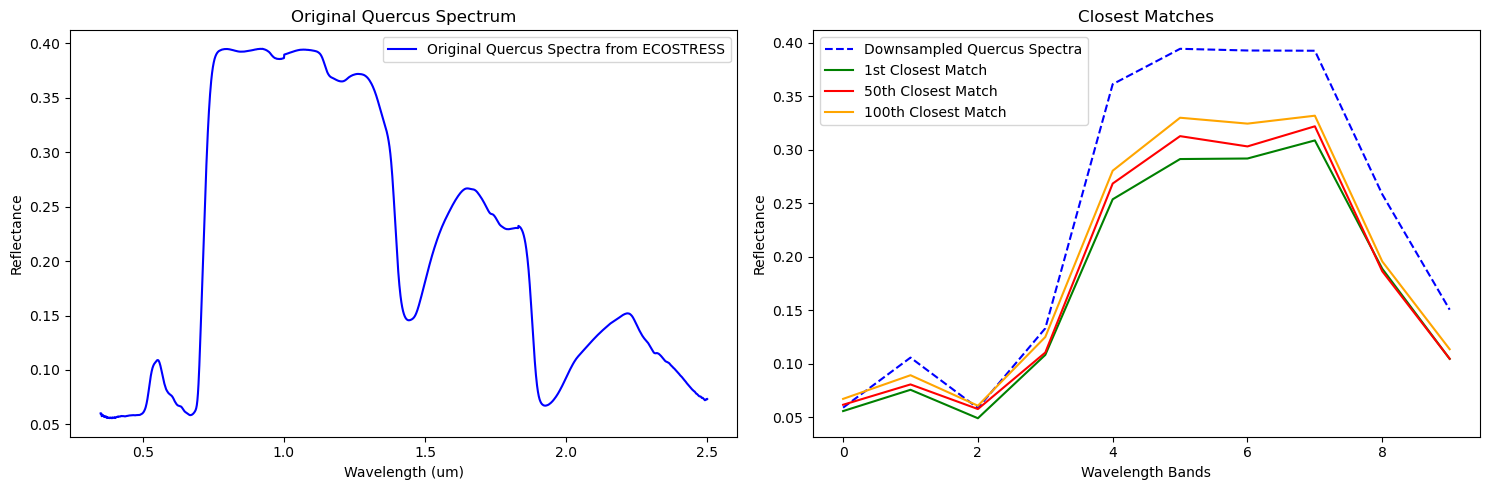

In [425]:
#same process for quercus
#Plot the quercus Spectra

# Create a figure with 2 subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Subplot 1: Plot original quercus spectrum
axes[0].plot(quercus['Wavelength'], quercus['Reflectance'], label="Original Quercus Spectra from ECOSTRESS", color='b')
axes[0].set_title("Original Quercus Spectrum")
axes[0].set_xlabel("Wavelength (um)")
axes[0].set_ylabel("Reflectance")
axes[0].legend()

# Subplot 2: Plot 1st, 50th, and 100th closest spectra
axes[1].plot(downsampled_quercus_np, label="Downsampled Quercus Spectra", color='b', linestyle ='--')
axes[1].plot(first_match_qs, label="1st Closest Match", color='g')
axes[1].plot(fiftieth_match_qs, label="50th Closest Match", color='r')
axes[1].plot(hundredth_match_qs, label="100th Closest Match", color='orange')
axes[1].set_title("Closest Matches")
axes[1].set_xlabel("Wavelength Bands")
axes[1].set_ylabel("Reflectance")
axes[1].legend()

# Display the plots
plt.tight_layout()
plt.show()

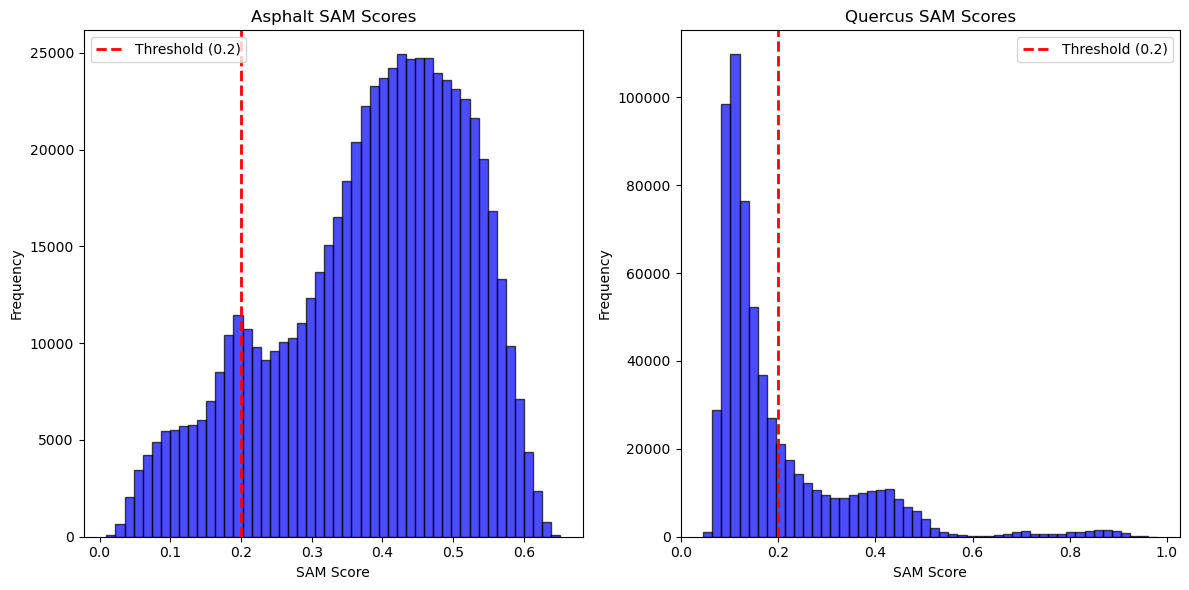

In [533]:
#Choose a threshold for SAM scores to display values lower than that threshold in original image.
threshold_angle_asp = 0.2
threshold_angle_qs = 0.2

# Create a 1x2 subplot layout for side-by-side histograms
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot the histogram for Asphalt SAM scores
axes[0].hist(asphalt_sam_scores.ravel(), bins=50, color='blue', alpha=0.7, edgecolor='black')
axes[0].axvline(threshold_angle_asp, color='red', linestyle='dashed', linewidth=2, label=f'Threshold ({threshold_angle_asp})')
axes[0].set_title("Asphalt SAM Scores")
axes[0].set_xlabel("SAM Score")
axes[0].set_ylabel("Frequency")
axes[0].legend()

# Plot the histogram for Quercus SAM scores
axes[1].hist(quercus_sam_scores.ravel(), bins=50, color='blue', alpha=0.7, edgecolor='black')
axes[1].axvline(threshold_angle_qs, color='red', linestyle='dashed', linewidth=2, label=f'Threshold ({threshold_angle_qs})')
axes[1].set_title("Quercus SAM Scores")
axes[1].set_xlabel("SAM Score")
axes[1].set_ylabel("Frequency")
axes[1].legend()

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the histograms
plt.show()


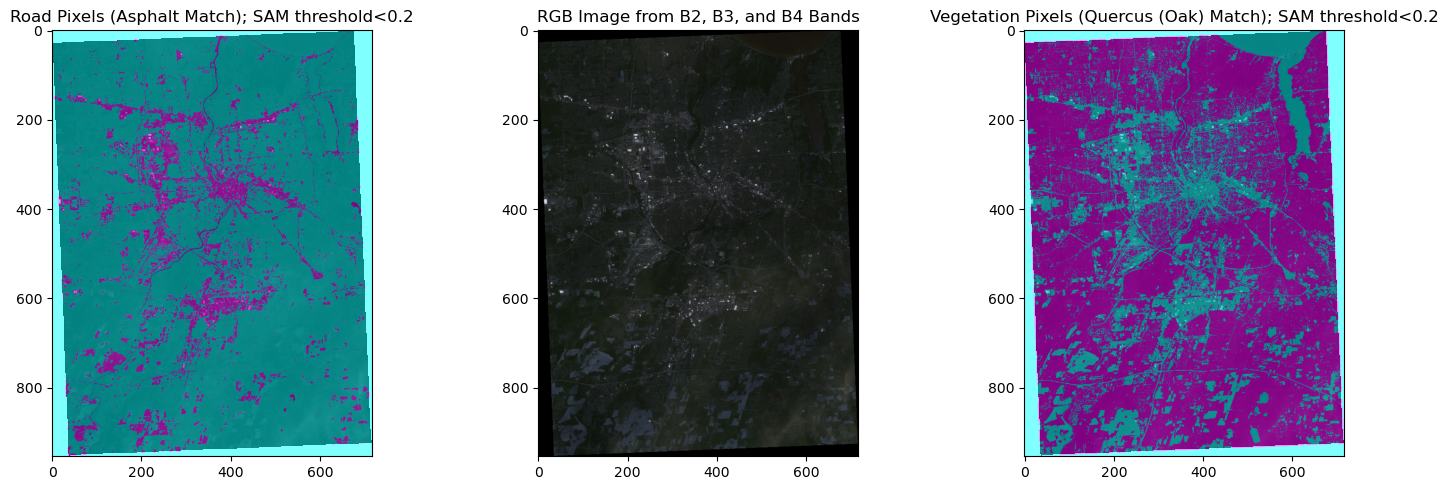

In [529]:
#Display results of threshold on both asphalt and quercus alongside original RGB image of data to distinguish asphalt(road) and vegetation(oak) in the imagery.
threshold_angle_asp = 0.2
threshold_angle_qs = 0.2

# Create a mask for pixels with a SAM score below the threshold (indicating similarity)
asphalt_mask = asphalt_sam_scores < threshold_angle_asp
quercus_mask = quercus_sam_scores < threshold_angle_qs

# Reshape the masks back to the original image
asphalt_mask_image = asphalt_mask.reshape(filtered_data.shape[0], filtered_data.shape[1])
quercus_mask_image = quercus_mask.reshape(filtered_data.shape[0], filtered_data.shape[1])

# Create a 1x3 subplot layout for three images side by side
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# RGB Image from B2, B3, and B4 bands
rgb_image = sentinel2_rochester_data[:, :, 1:4]

# Normalize values between 0 and 1
rgb_image = (rgb_image - np.nanmin(rgb_image)) / (np.nanmax(rgb_image) - np.nanmin(rgb_image))

# Overlay the asphalt mask on the original image (on the left)
axes[0].imshow(filtered_data[:, :, 0], cmap='gray')  # Original image band
axes[0].imshow(asphalt_mask_image, cmap='cool', alpha=0.5)  # Overlay mask
axes[0].set_title("Road Pixels (Asphalt Match); SAM threshold<0.2")

# Display the RGB image (in the middle)
axes[1].imshow(rgb_image)
axes[1].axis("on")
axes[1].set_title("RGB Image from B2, B3, and B4 Bands")

# Overlay the quercus mask on the original image (on the right)
axes[2].imshow(filtered_data[:, :, 0], cmap='gray')
axes[2].imshow(quercus_mask_image, cmap='cool', alpha=0.5)
axes[2].set_title("Vegetation Pixels (Quercus (Oak) Match); SAM threshold<0.2")

plt.tight_layout()
plt.show()